In [2]:
### This Jupyter Notebook visualises the link between tidal range data and sensor data and how these datasets demonstrate an effect on water quality

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [3]:
### Import

old_sensor_df = pd.read_csv('./datafiles/WQ_watershed -2018 copy.csv', delimiter=',')
old_sensor_df['period']= old_sensor_df["Date"].map(str) + old_sensor_df["Time"].map(str) # create key

tidal_df2018 = pd.read_csv('./datafiles/tidal_2018.csv', delimiter=',')
delayed_tide = pd.read_csv('./datafiles/tidal_2018_delayed.csv', delimiter = ',')
tidal_df2018['ASLVBG02'] = tidal_df2018['ASLVBG02']#.#astype(int)
tidal_df2018['Residual'] = tidal_df2018['Residual']#.astype(int)
tidal_df2018['Cycle'] = tidal_df2018['Cycle'].astype(str)

tidal_df2018['period']= tidal_df2018["Date"].map(str) + tidal_df2018["Time"].map(str)

tide_sensordf = pd.merge(old_sensor_df, tidal_df2018, on = 'period')
print(delayed_tide)

      Cycle        Date     Time ASLVBG02  Residual
0        1)  2018-01-01  0:00:00      NaN       NaN
1        2)  2018-01-01  0:15:00      NaN       NaN
2        3)  2018-01-01  0:30:00      NaN       NaN
3        4)  2018-01-01  0:45:00      NaN       NaN
4        5)  2018-01-01  1:00:00      NaN       NaN
5        6)  2018-01-01  1:15:00      NaN       NaN
6        7)  2018-01-01  1:30:00      NaN       NaN
7        8)  2018-01-01  1:45:00      NaN       NaN
8        9)  2018-01-01  2:00:00      NaN       NaN
9       10)  2018-01-01  2:15:00      NaN       NaN
10      11)  2018-01-01  2:30:00      NaN       NaN
11      12)  2018-01-01  2:45:00      NaN       NaN
12      13)  2018-01-01  3:00:00      NaN       NaN
13      14)  2018-01-01  3:15:00      NaN       NaN
14      15)  2018-01-01  3:30:00      NaN       NaN
15      16)  2018-01-01  3:45:00      NaN       NaN
16      17)  2018-01-01  4:00:00      NaN       NaN
17      18)  2018-01-01  4:15:00      NaN       NaN
18      19) 

In [4]:
# Function to determine the max values of a tidal range

def maxTidalVals(dataframe):
    np_arr = dataframe.values
    np_arr = np_arr.tolist()
    
    peaks, _= find_peaks(np_arr) #find max value of a tide

    peaks = peaks.tolist()
    pvals = []
    
    for i in range(len(peaks)):
        pvals.append(np_arr[peaks[i]])
    
    peaks_df = pd.DataFrame()
    peaks_df['yvals'] = pvals 
    peaks_df['xvals'] = peaks
    
    A= peaks_df.join(dataframe, how='outer')
    
    i=0
    for j in range(len(np_arr)):
        if i > len(peaks)-1:
            break
        if j <= peaks[i]:
            np_arr[j]=pvals[i]
        else:
            i=i+1
            
    df = pd.DataFrame({'maxTidalVals':np_arr})
    
    return df
    
df_arr = maxTidalVals(tidal_df2018['Residual'])
df_arr_delay = maxTidalVals(delayed_tide['Residual'])
print(df_arr_delay)

df_arr_delay.columns = ['maxTidalValsDelayed']
print(df_arr_delay)
final = pd.concat([df_arr,tidal_df2018, df_arr_delay], axis=1)

#print(final)

       maxTidalVals
0              0.65
1              0.65
2              0.65
3              0.65
4              0.65
5              0.65
6              0.65
7              0.65
8              0.65
9              0.65
10             0.65
11             0.65
12             0.65
13             0.65
14             0.65
15             0.65
16             0.65
17             0.65
18             0.65
19             0.65
20             0.65
21             0.65
22             0.65
23             0.65
24             0.65
25             0.65
26             0.65
27             0.65
28             0.65
29             0.65
...             ...
35329         -3.33
35330         -3.33
35331         -3.33
35332         -3.33
35333         -3.33
35334         -3.33
35335         -3.33
35336         -3.33
35337         -3.33
35338         -3.33
35339         -3.33
35340         -3.33
35341         -3.33
35342         -3.33
35343         -3.33
35344         -3.33
35345         -3.33
35346         -3.33


In [5]:
# function to reduce the number of outliers in a noisy time series (for better analysis)

def outlierReduction(dirty_data, thresh):
    outliers = []
    outliers = dirty_data.rolling(window=3, center=True).median()
    difference = np.abs(dirty_data - outliers)
    print(len(outliers))
    print(len(dirty_data))
    outlier_idx = []
    vals = []
    for i in range(len(dirty_data)):
        difference = np.abs(dirty_data[i] - outliers[i])
        if difference > threshold:
            outlier_idx.append(i)
            vals.append(dirty_data[i])
    return dirty_data.drop(outlier_idx), outlier_idx, vals
    
    

threshold = 0.1  
clean_conductivity, o1, v1 = outlierReduction(tide_sensordf['Cond µS/cm'],threshold)
clean_turbidity, o2, v2 = outlierReduction(tide_sensordf['Turbidity FNU'], threshold)
#A = clean_turbidity.to_frame()
#print((tide_sensordf['Turbidity FNU']))
#print((A['Turbidity FNU']))
#clean_turbidity = clean_turbidity[np.logical_not(np.isnan(clean_turbidity))]
#print(type(clean_turbidity))
##clean_turbidity2, o22, v22 = outlierReduction(clean_turbidity, threshold)

8247
8247
8247
8247


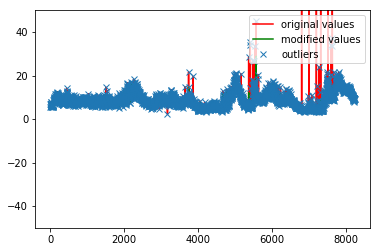

In [6]:
tidal_sensordf = pd.merge(old_sensor_df, final, on= 'period',how= 'inner')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(tidal_sensordf['Turbidity FNU'], 'r', label = 'original values')
ax.plot(clean_turbidity, 'g', label = 'modified values')
#ax.plot(clean_turbidity2, 'm', label = 'modified values')


ax.plot(o2,v2 , 'x', label = 'outliers')
#ax.plot(tidal_sensordf['Turbidity FNU'], 'g')
#ax.set_xlim([0,7000])
ax.set_ylim([-50,50])
ax.legend(loc="upper right")



#fig.savefig('outliers.png')

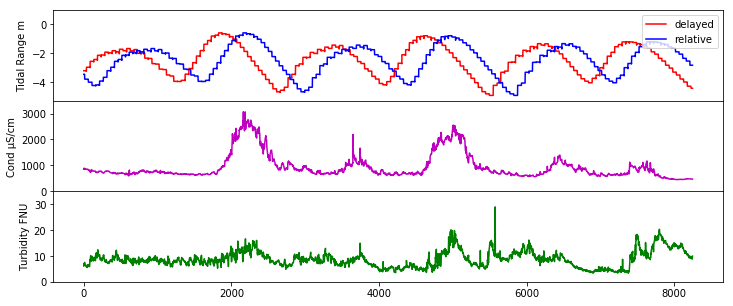

In [13]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(12,5))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

# Plot each graph, and manually set the y tick values
axs[0].plot(tidal_sensordf['maxTidalVals'],'r', label = "delayed")
axs[0].plot(tidal_sensordf['maxTidalValsDelayed'], 'b', label = "relative")
axs[0].set_ylabel('Tidal Range m')
axs[0].set_ylim(-5.3, 1)
axs[0].legend(loc="upper right")



axs[1].plot(clean_conductivity, 'm')
axs[1].set_ylabel('Cond µS/cm')
axs[1].set_ylim(0, 3500)

axs[2].plot(clean_turbidity, 'g')
#axs[2].set_yticks(np.arange(-0.9, 1.0, 0.4))
axs[2].set_ylabel('Turbidity FNU')
axs[2].set_ylim(0, 35)

fig.savefig('sensor_vs_tide.png')

In [8]:
tidal_sensordf.corr(method = 'pearson')
print((delayed_tide))

      Cycle        Date     Time ASLVBG02  Residual
0        1)  2018-01-01  0:00:00      NaN       NaN
1        2)  2018-01-01  0:15:00      NaN       NaN
2        3)  2018-01-01  0:30:00      NaN       NaN
3        4)  2018-01-01  0:45:00      NaN       NaN
4        5)  2018-01-01  1:00:00      NaN       NaN
5        6)  2018-01-01  1:15:00      NaN       NaN
6        7)  2018-01-01  1:30:00      NaN       NaN
7        8)  2018-01-01  1:45:00      NaN       NaN
8        9)  2018-01-01  2:00:00      NaN       NaN
9       10)  2018-01-01  2:15:00      NaN       NaN
10      11)  2018-01-01  2:30:00      NaN       NaN
11      12)  2018-01-01  2:45:00      NaN       NaN
12      13)  2018-01-01  3:00:00      NaN       NaN
13      14)  2018-01-01  3:15:00      NaN       NaN
14      15)  2018-01-01  3:30:00      NaN       NaN
15      16)  2018-01-01  3:45:00      NaN       NaN
16      17)  2018-01-01  4:00:00      NaN       NaN
17      18)  2018-01-01  4:15:00      NaN       NaN
18      19) 

In [10]:
newdf = pd.DataFrame()
newdf['Delayed Tide'] = tidal_sensordf['maxTidalVals']
newdf['Relative Tide'] = delayed_tide['Residual']
newdf['Conductivity'] = clean_conductivity.to_frame()
newdf['Turbidity'] = clean_turbidity.to_frame()
A = newdf.corr()
print(A)


               Delayed Tide  Relative Tide  Conductivity  Turbidity
Delayed Tide       1.000000      -0.196817      0.122910   0.104305
Relative Tide     -0.196817       1.000000     -0.335384  -0.192259
Conductivity       0.122910      -0.335384      1.000000   0.333676
Turbidity          0.104305      -0.192259      0.333676   1.000000
